Face detection using opencv


In [73]:
from google.colab import drive
drive.mount('/content/gdrive')
# cd /content/gdrive/MyDrive/Colab\ Notebooks

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import cv2
from cv2 import imread
from google.colab.patches import cv2_imshow
from cv2 import CascadeClassifier
from cv2 import rectangle
from cv2 import destroyAllWindows
print (cv2.__version__)

4.1.2


In [ ]:
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')

In [71]:
pixels = imread('test4.JPG')
#detect faces
bboxes = classifier.detectMultiScale(pixels, 1.2, 7)
#drawing boxes
for box in bboxes:
    x, y, width, height = box
    x2, y2 = x+width, y+height
    rectangle(pixels, (x,y), (x2,y2), (0,0,255),1)


In [72]:
cv2_imshow( pixels)
# waitkey(0)
destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

Face detection using Deep learning

In [ ]:
pip install mtcnn

In [90]:
from mtcnn import MTCNN
from matplotlib import pyplot
from matplotlib.patches import Rectangle

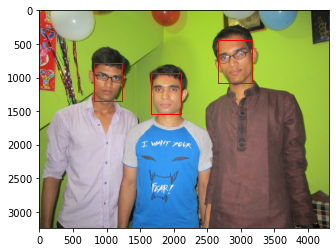

In [114]:
filename = 'test3.JPG'
pixels = pyplot.imread(filename)

#creat a detector, using the default weight
detector = MTCNN()
faces = detector.detect_faces(pixels)

for face in faces:
    x,y,width,heigth = face['box']

draw_image_with_boxes(filename, faces)

In [115]:
#draw rectangle box in image
def draw_image_with_boxes(filename, result_list):
    data = pyplot.imread(filename)
    pyplot.imshow(data)
    ax = pyplot.gca()
    for result in result_list:
        x,y,width,height = result['box']
        rect = Rectangle((x,y), width, height, fill=False, color='red')
        ax.add_patch(rect)
    
    # pyplot.imshow()


Draw faces separately

In [116]:
def separate_faces(filename,result_list):
    data = pyplot.imread(filename)
    for i in range(len(result_list)):
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1+width, y1+height
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        pyplot.imshow(data[y1:y2, x1:x2])
    # pyplot.imshow()

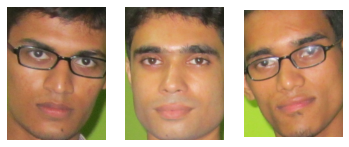

In [120]:
filename1 = 'test3.JPG'
pixels = pyplot.imread(filename1)
detector = MTCNN()
faces = detector.detect_faces(pixels)
separate_faces(filename1, faces)